In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
bitcoin = pd.read_csv('/content/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [5]:
bitcoin.shape

(160492, 8)

In [6]:
bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, '$ Price')

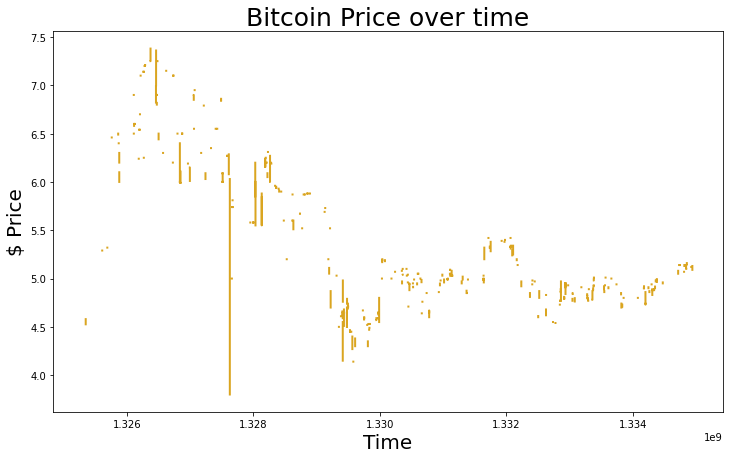

In [7]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin["Timestamp"], bitcoin["Weighted_Price"], color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

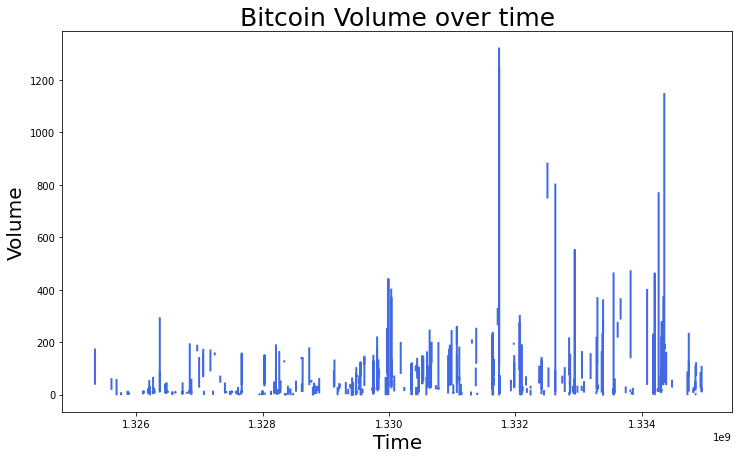

In [8]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin["Timestamp"], bitcoin["Volume_(Currency)"], color='royalblue', lw=2)
plt.title("Bitcoin Volume over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Volume", size=20);

In [9]:
bitcoin.isnull().sum()

Timestamp                 0
Open                 158344
High                 158344
Low                  158344
Close                158344
Volume_(BTC)         158344
Volume_(Currency)    158344
Weighted_Price       158344
dtype: int64

In [10]:
bitcoin['Dates'] = pd.to_datetime(bitcoin['Timestamp'], unit='s')
bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Dates
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:53:00
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:54:00
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:55:00
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:56:00


In [11]:
bitcoin.dropna(inplace=True)

In [12]:
required_features = ['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']
output_label = 'Close'

In [13]:
x_train, x_test, y_train, y_test = train_test_split(
bitcoin[required_features],
bitcoin[output_label],
test_size = 0.3
)

In [14]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
model.score(x_test, y_test)

0.9998748588799933

In [16]:
future_set = bitcoin.shift(periods=30).tail(30)

In [17]:
prediction = model.predict(future_set[required_features])

Text(0, 0.5, '$ Price')

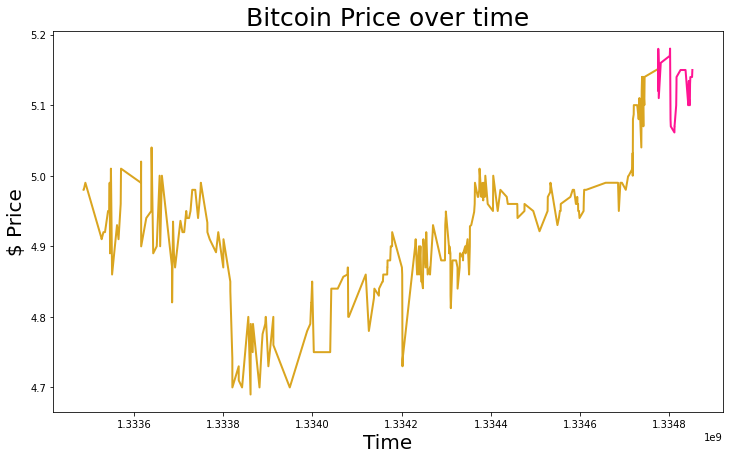

In [18]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin["Timestamp"][-400:-60], bitcoin["Weighted_Price"][-400:-60], color='goldenrod', lw=2)
plt.plot(future_set["Timestamp"], prediction, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)